# Process of Benchmarking data

In [1]:
from functions import averageOfFidelity, stdOfFidelity, decay_param, decay_func
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
from scipy.optimize import curve_fit

In [3]:
n_qubit = 2
noise_model = 'depolarising_noise'
epsilon = 0.0001
path = os.path.join( os.getcwd(), 'output_storage', noise_model, 'epsilon{}'.format(epsilon) )

In [4]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [5]:
ordered_layers = np.load(os.path.join(path, 'layers_indices.npy'))

In [6]:
avg_std_fdlty_arr = np.load(os.path.join(path, 'rb_standard_50_avg_layers.npy'))
err_std_fdlty_arr = np.load(os.path.join(path, 'rb_standard_50_err_layers.npy'))

avg_rng_fdlty_arr = np.load(os.path.join(path, 'rb_native_standard_50_avg_layers.npy'))
err_rng_fdlty_arr = np.load(os.path.join(path, 'rb_native_standard_50_err_layers.npy'))

In [7]:
popt_std, pcov_std = curve_fit(decay_func, ordered_layers, avg_std_fdlty_arr
                               , bounds=([0,0,-10], [1., 10., 0.]))
r_std = decay_param(popt_std[0], n_qubit)

In [8]:
popt_rng, pcov_rng = curve_fit(decay_func, ordered_layers, avg_rng_fdlty_arr
                               , bounds=([0,0,-10], [1., 10., 0.]))
r_rng = decay_param(popt_rng[0], n_qubit)

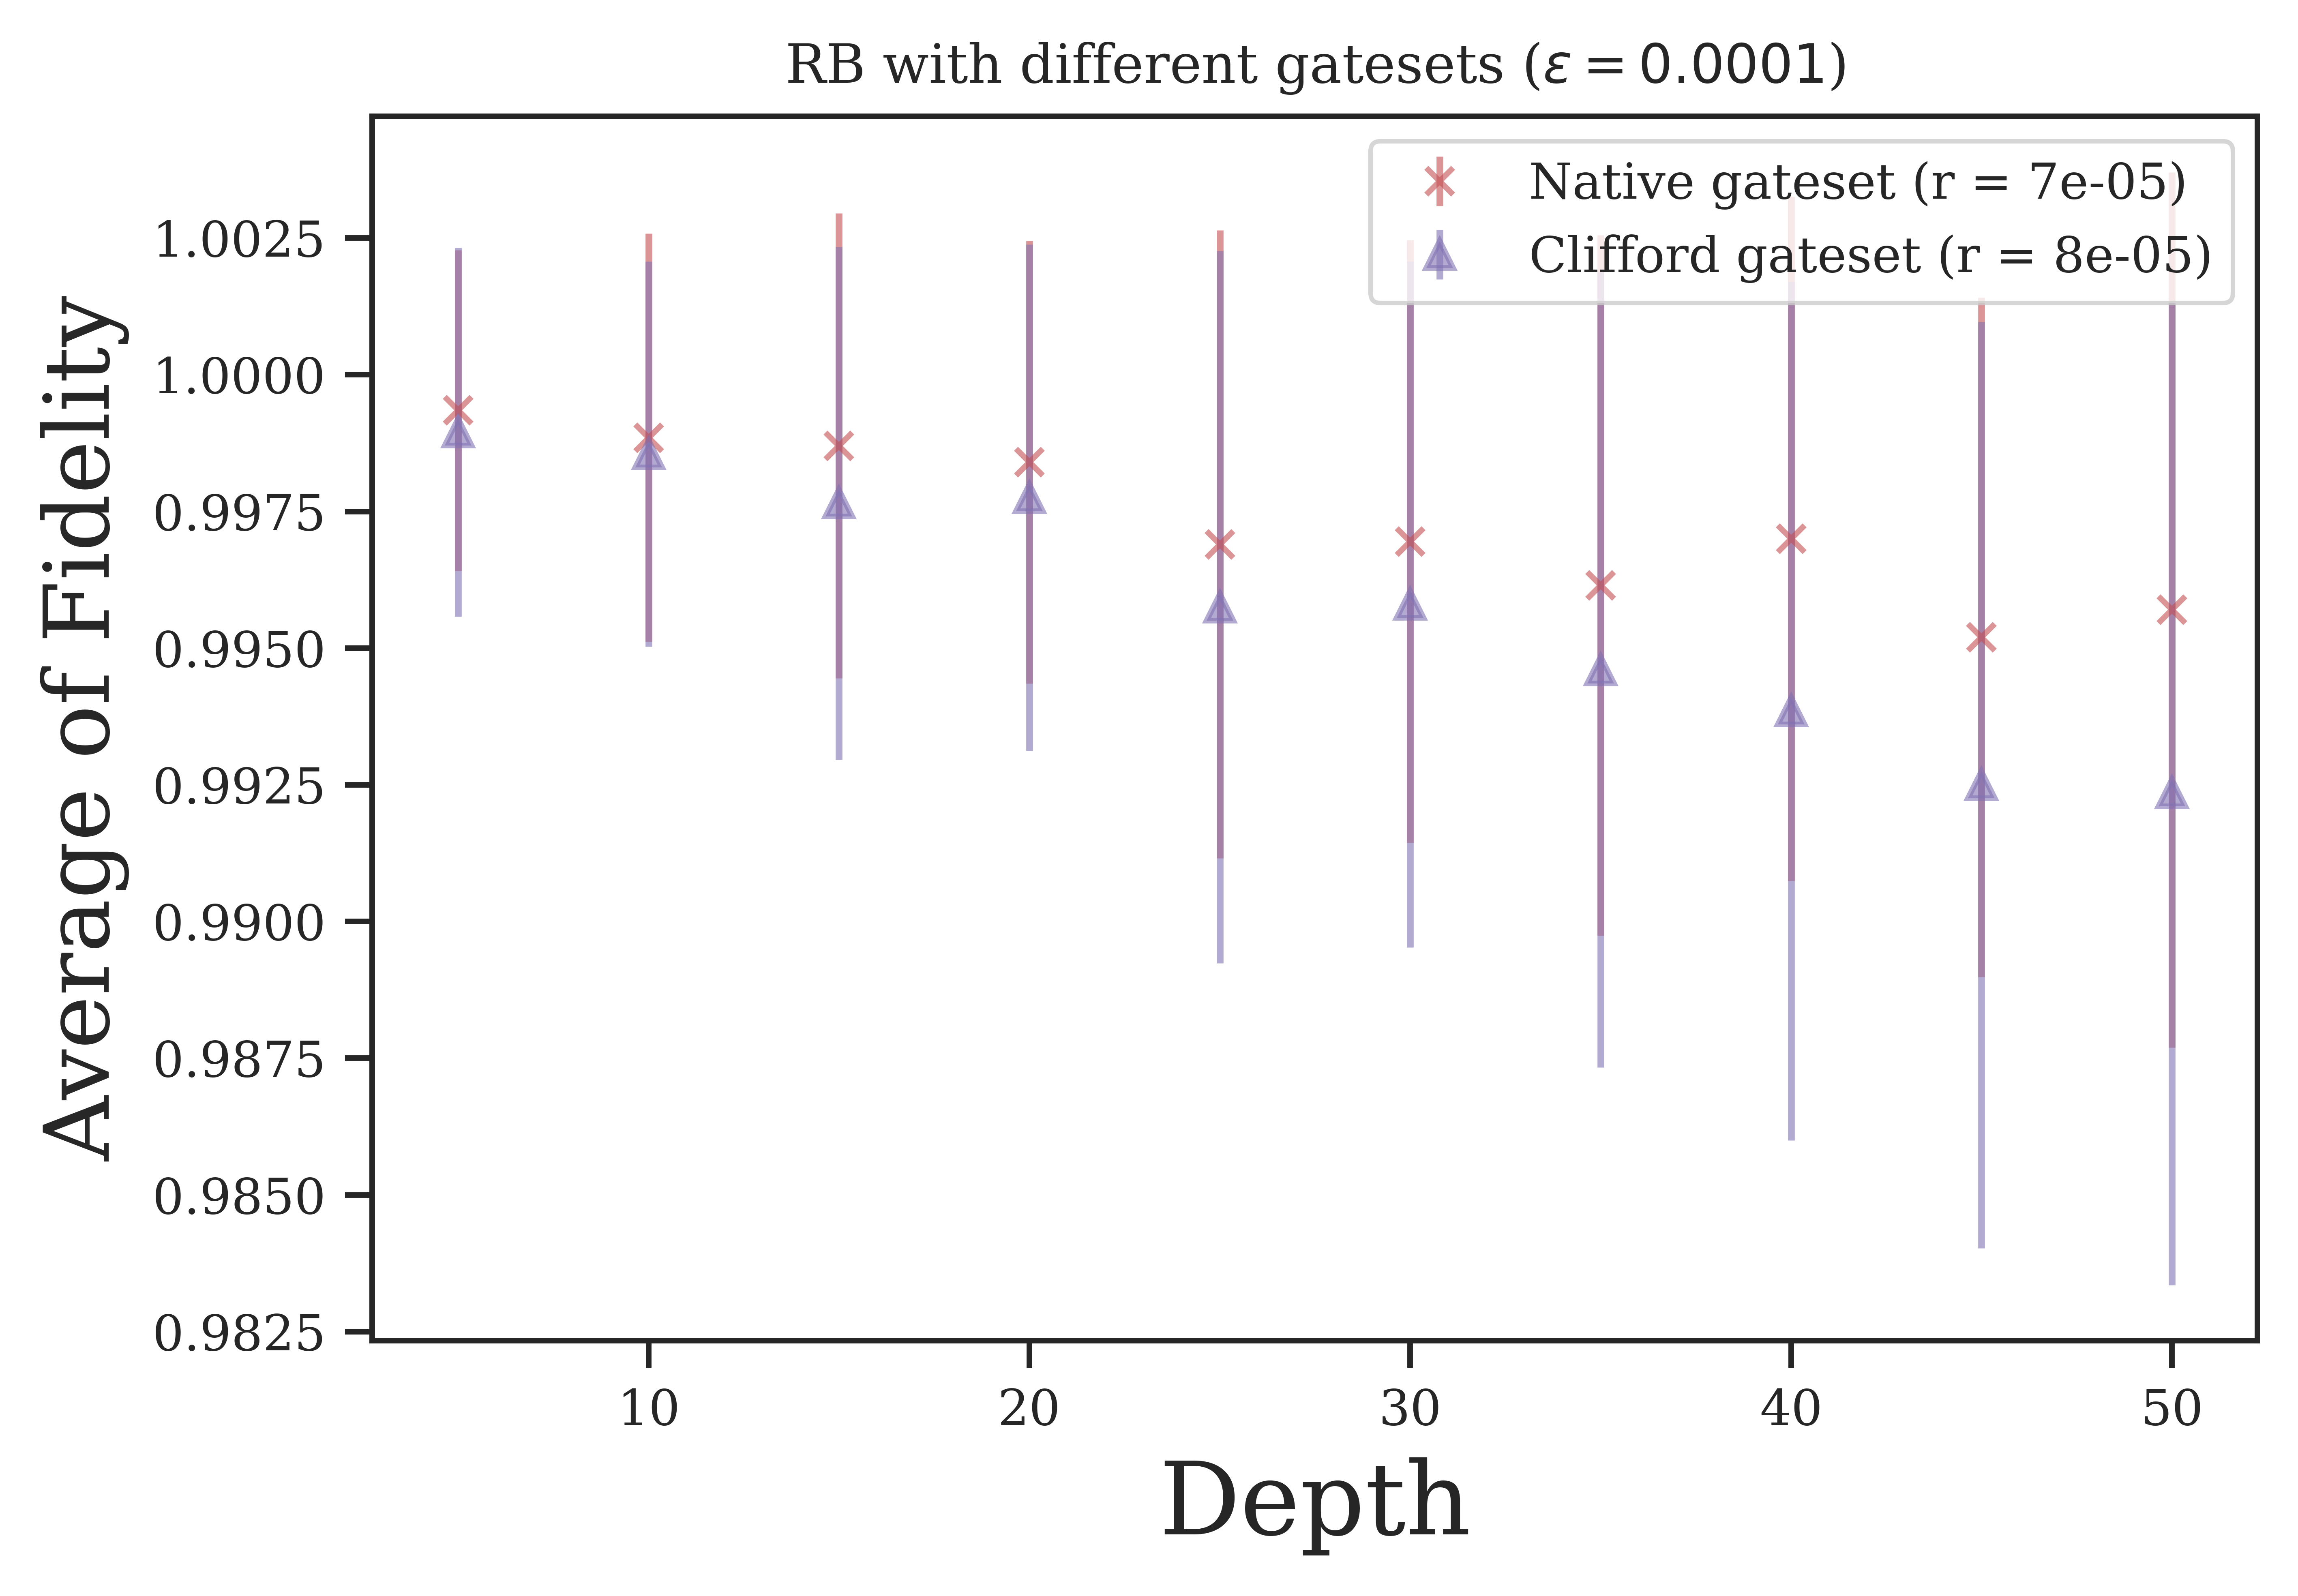

In [9]:
fig = plt.figure(dpi = 1000)
ax = fig.add_subplot()

# plt.loglog()

ax.errorbar(ordered_layers, avg_rng_fdlty_arr, yerr = err_rng_fdlty_arr,
            fmt='x',color = 'r', alpha = 0.6,
            label = 'Native gateset (r = {})'.format(np.round(r_rng,5)))
ax.errorbar(ordered_layers, avg_std_fdlty_arr, yerr = err_std_fdlty_arr,
            fmt = '^', color = 'm', alpha = 0.6,
            label = 'Clifford gateset (r = {})'.format(np.round(r_std,5)))

plt.xlabel('Depth', fontsize=18)
plt.ylabel('Average of Fidelity', fontsize=16)
plt.title(r'RB with different gatesets ($\epsilon = {}$)'.format(epsilon))

plt.legend()

fig.savefig(os.path.join(path, 'RB_std_ntv_comparison.png'))
